In [1]:
import warnings

warnings.filterwarnings( 'ignore' )

In [2]:
import pandas as pd

mobility_file_name = 'user_mobility.csv'

mobility_df = pd.read_csv('C:\\content_caching\\'+mobility_file_name)
mobility_df

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,time_gap,distance,theta
0,0,0.208329,1.118491,0.297667,1.302239,990.0,0.204315,64.071156
1,1,1.185848,1.191541,0.987993,1.324956,810.0,0.238634,146.007878
2,2,1.185848,1.191541,1.050512,1.181991,576.0,0.135672,-175.963389
3,3,1.117968,1.342919,0.957024,1.360047,296.0,0.161853,173.925159
4,4,1.511685,1.290095,1.242042,1.374727,686.0,0.282613,162.574691
...,...,...,...,...,...,...,...,...
765604,767645,1.240805,1.225214,1.028172,1.085493,558.0,0.254431,-146.691073
765605,767646,1.240805,1.225214,1.052632,1.170732,3.0,0.195902,-163.852551
765606,767647,1.383154,1.378366,1.122807,1.365854,553.0,0.260648,-177.248498
765607,767648,1.240805,1.480467,1.122807,1.365854,544.0,0.164499,-135.833684


In [3]:
try:
    mobility_df = mobility_df.drop('Unnamed: 0', axis=1)
except:
    print('No index column')

mobility_df

,start_lat,start_lng,end_lat,end_lng,time_gap,distance,theta
0,0.208329,1.118491,0.297667,1.302239,990.0,0.204315,64.071156
1,1.185848,1.191541,0.987993,1.324956,810.0,0.238634,146.007878
2,1.185848,1.191541,1.050512,1.181991,576.0,0.135672,-175.963389
3,1.117968,1.342919,0.957024,1.360047,296.0,0.161853,173.925159
4,1.511685,1.290095,1.242042,1.374727,686.0,0.282613,162.574691
...,...,...,...,...,...,...,...
765604,1.240805,1.225214,1.028172,1.085493,558.0,0.254431,-146.691073
765605,1.240805,1.225214,1.052632,1.170732,3.0,0.195902,-163.852551
765606,1.383154,1.378366,1.122807,1.365854,553.0,0.260648,-177.248498
765607,1.240805,1.480467,1.122807,1.365854,544.0,0.164499,-135.833684


In [4]:
import pandas as pd

rating_df = pd.read_csv('C:\\content_caching\\ml-25m\\ratings.csv')
rating_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [5]:
import time
import datetime

print('min timestamp: ',rating_df['timestamp'].min(), str(datetime.datetime.fromtimestamp(rating_df['timestamp'].min())))
print('max timestamp: ',rating_df['timestamp'].max(), str(datetime.datetime.fromtimestamp(rating_df['timestamp'].max())))

min timestamp:  789652009 1995-01-09 20:46:49
max timestamp:  1574327703 2019-11-21 18:15:03


In [6]:
import time
import datetime

standard_year = '2019'
standard_time = standard_year+'-01-01 00:00:00' # 2019년 데이터만 사용
standard_time = datetime.datetime.strptime(standard_time, '%Y-%m-%d %H:%M:%S')
standard_timestamp = int(time.mktime(standard_time.timetuple()))
print('test timestamp: ', standard_timestamp)
print('test time: ',str(datetime.datetime.fromtimestamp(standard_timestamp)))

test timestamp:  1546268400
test time:  2019-01-01 00:00:00


In [7]:
after2019_rating_df = rating_df[rating_df['timestamp'] >= standard_timestamp].reset_index(drop=True)
after2019_rating_df

,userId,movieId,rating,timestamp
0,3,1274,4.5,1566088819
1,3,1732,4.5,1566091883
2,3,1960,4.0,1566090766
3,3,2021,4.0,1566089449
4,3,3408,3.5,1566089773
...,...,...,...,...
1202597,162536,148626,5.0,1572259347
1202598,162536,148685,5.0,1572257813
1202599,162536,164179,4.0,1572259078
1202600,162536,202429,4.0,1572257782


In [8]:
standards = {'January':['2019-01-01 00:00:00', '2019-02-01 00:00:00'],
             'February':['2019-02-01 00:00:00', '2019-03-01 00:00:00'],
             'March':['2019-03-01 00:00:00', '2019-04-01 00:00:00'],
             'April':['2019-04-01 00:00:00', '2019-05-01 00:00:00'],
             'May':['2019-05-01 00:00:00', '2019-06-01 00:00:00'],
             'June':['2019-06-01 00:00:00', '2019-07-01 00:00:00'],
             'July':['2019-07-01 00:00:00', '2019-08-01 00:00:00'],
             'August':['2019-08-01 00:00:00', '2019-09-01 00:00:00'],
             'September':['2019-09-01 00:00:00', '2019-10-01 00:00:00'],
             'October':['2019-10-01 00:00:00', '2019-11-01 00:00:00'],
             'November':['2019-11-01 00:00:00', '2019-12-01 00:00:00'],
             'December':['2019-12-01 00:00:00', '2020-01-01 00:00:00']
             }

Month = list(standards.keys())[11-1] # 4월 -1 index
print(Month)

start_time = datetime.datetime.strptime(standards[Month][0], '%Y-%m-%d %H:%M:%S')
end_time = datetime.datetime.strptime(standards[Month][1], '%Y-%m-%d %H:%M:%S')

start_timestamp = int(time.mktime(start_time.timetuple()))
end_timestamp = int(time.mktime(end_time.timetuple()))

print(start_time, start_timestamp)
print(end_time, end_timestamp)

month_rating_df = after2019_rating_df[(after2019_rating_df['timestamp'] < end_timestamp) &
                                   (after2019_rating_df['timestamp'] >= start_timestamp)].reset_index(drop=True)

# 10월까지 1,216 개 생성. 
# 11월까지 1,300 개 생성. 
if Month == 'November': # 12월 데이터는 존재하지 않음. 11월 존재하는 데이터까지만 진행.
    end_timestamp = month_rating_df['timestamp'].max()

month_rating_df

November
2019-11-01 00:00:00 1572534000
2019-12-01 00:00:00 1575126000


,userId,movieId,rating,timestamp
0,4,1,3.0,1573944252
1,4,260,3.5,1573938415
2,4,296,4.0,1573938898
3,4,541,4.5,1573944303
4,4,589,4.0,1573939042
...,...,...,...,...
67396,162190,204698,1.5,1573824042
67397,162257,204698,3.0,1573410931
67398,162305,204692,1.5,1573107264
67399,162516,179749,3.0,1572577455


In [9]:
# 해당 월에 데이터가 없다면 종료.
import sys

if len(month_rating_df) == 0:
    sys.exit('해당 월에 데이터 없음')

In [10]:
import pandas as pd

# Assuming your DataFrame is named month_rating_df

# Count the frequency of each movieId
movie_frequency = month_rating_df['movieId'].value_counts()

# Create a dictionary to map original movieIds to their corresponding frequencies
movie_frequency_map = movie_frequency.to_dict()

# Sort the dictionary by frequency and assign new movieId values starting from 0
sorted_movie_ids = sorted(movie_frequency_map, key=lambda x: movie_frequency_map[x], reverse=True)
remapped_ids = {movie_id: idx for idx, movie_id in enumerate(sorted_movie_ids)}

# Apply the remapping to the DataFrame
month_rating_df['remapped_movieId'] = month_rating_df['movieId'].map(remapped_ids)

# Now month_rating_df contains a new column 'remapped_movieId' with the remapped values
month_rating_df

,userId,movieId,rating,timestamp,remapped_movieId
0,4,1,3.0,1573944252,75
1,4,260,3.5,1573938415,9
2,4,296,4.0,1573938898,13
3,4,541,4.5,1573944303,86
4,4,589,4.0,1573939042,89
...,...,...,...,...,...
67396,162190,204698,1.5,1573824042,0
67397,162257,204698,3.0,1573410931,0
67398,162305,204692,1.5,1573107264,1024
67399,162516,179749,3.0,1572577455,2174


In [11]:
movie_id_probabilites = month_rating_df['remapped_movieId'].value_counts() / month_rating_df['remapped_movieId'].value_counts().sum()
movie_id_probabilites

0        0.004199
1        0.003101
2        0.003101
3        0.003027
4        0.003027
           ...   
10876    0.000015
10877    0.000015
10878    0.000015
10879    0.000015
10880    0.000015
Name: remapped_movieId, Length: 10881, dtype: float64

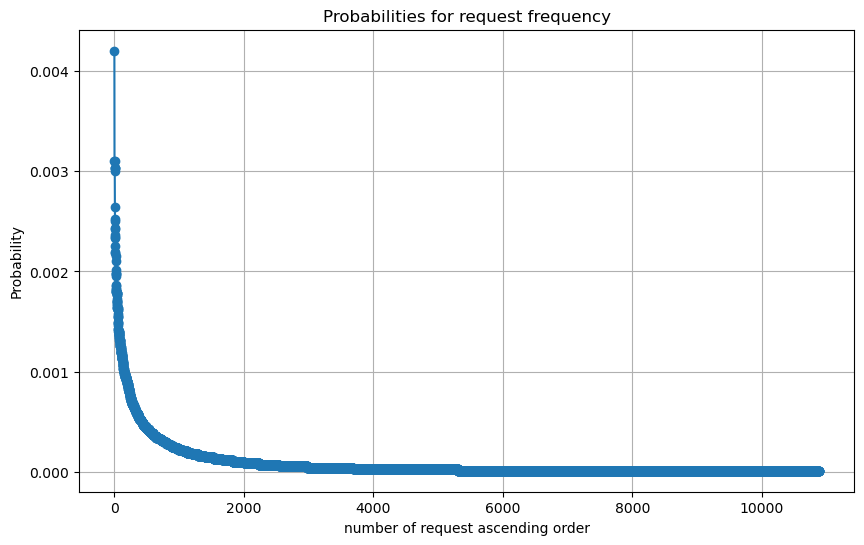

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualize the probabilities for the first row
plt.figure(figsize=(10, 6))
plt.plot(range(len(movie_id_probabilites.values)), movie_id_probabilites.values, marker='o')
plt.xlabel('number of request ascending order')
plt.ylabel('Probability')
plt.title('Probabilities for request frequency')
plt.grid(True)
plt.show()

In [13]:
movie_id_probabilites.sum()

1.0

In [14]:
pareto = int(month_rating_df['movieId'].nunique() * 0.2)
print('top 20% 개수 : ', pareto)

pareto_probability = sum(movie_id_probabilites.values[:pareto+1])
print('top 20% 비율 : ', pareto_probability)

top 20% 개수 :  2176
top 20% 비율 :  0.7836678981024137


In [15]:
number_of_service_Ids = 64

Y = 0.2

pareto_number_of_service_ids = int(number_of_service_Ids * Y)

pareto_number_of_movies_per_service = int(pareto / pareto_number_of_service_ids) + 1
print('pareto : ',pareto_number_of_service_ids, pareto_number_of_movies_per_service)

not_pareto_number_of_service_ids = number_of_service_Ids - pareto_number_of_service_ids
try:
    not_pareto_number_of_movies_per_service = int((month_rating_df['movieId'].nunique()-pareto) / not_pareto_number_of_service_ids) + 1
except:
    not_pareto_number_of_movies_per_service = 0
print('rest pareto : ', not_pareto_number_of_service_ids, not_pareto_number_of_movies_per_service)

pareto :  12 182
rest pareto :  52 168


In [16]:
# Create a mapping dictionary for remapped_movieId to service_id
mapping_dict = {}

pareto = pareto_number_of_service_ids * pareto_number_of_movies_per_service

# Map the remapped_movieId values to service_id values
current_service_id = 0
for value in range(pareto):
    if value % pareto_number_of_movies_per_service == 0 and value != 0:
        current_service_id += 1
    mapping_dict[value] = current_service_id

for value in range(pareto, month_rating_df['movieId'].nunique()):
    tmp_value = value-pareto
    try:
        if tmp_value % not_pareto_number_of_movies_per_service == 0:
            current_service_id += 1
        mapping_dict[value] = current_service_id
    except:
        break

In [17]:
mapping_dict

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [18]:
import random

# Set the seed value
random.seed(42)

# Example usage
number_of_sample_users = 1000
number_of_mecs = 9  # Number of sqrt MECs
mecs = [(x, y) for x in range(int(number_of_mecs**(1/2))) for y in range(int(number_of_mecs**(1/2)))]

print(mecs)

mean_velocity = 1.0
correlation_time = 0.5

# Number of move
num_steps = 1

now_positions = [(round(random.uniform(0, int(number_of_mecs**(1/2))-1), 13), round(random.uniform(0, int(number_of_mecs**(1/2))-1), 13)) for _ in range(number_of_sample_users)]
print('min,  max : ', 0, int(number_of_mecs**(1/2))-1)
print('now_positions[1] : ', now_positions[10])

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
min,  max :  0 2
now_positions[1] :  (1.6116385036656, 1.3962787899765)


In [19]:
import random

random.seed(42)

shffled_group_id_per_mec = []
# Step 1: Create empty groups
groups = [[] for _ in range(64)]

# Step 2: Populate groups based on values
for key, value in mapping_dict.items():
    groups[value].append((key))

service_id_per_mec = []
for mec in range(number_of_mecs):
    random.shuffle(groups)
    shuffled_ids = []

    tmp_mapping_dict = {}
    for service_id, keys in enumerate(groups):
        shuffled_ids.append(mapping_dict[keys[0]]) # save original service id

        for key in keys:
            tmp_mapping_dict[key] = service_id # service id remapping

    shffled_group_id_per_mec.append(shuffled_ids)
    service_id_per_mec.append(tmp_mapping_dict)

len(service_id_per_mec)

9

In [20]:
for idx in range(len(service_id_per_mec)):
    count = 0

    for value in service_id_per_mec[idx].values():
        if value == 0:
            count+=1

    print(idx, count)

0 168
1 182
2 168
3 182
4 168
5 182
6 168
7 182
8 168


In [21]:
mapping_dict

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [22]:
import ast  # This is needed to parse the string as a tuple

data = {
    'userId' : range(number_of_sample_users),
    'x_position' : [now_position[0] for now_position in now_positions],
    'y_position' : [now_position[1] for now_position in now_positions]
}

case = input()
num = 1216

if case == '4':
    user_df = pd.read_csv('./case4_user_mobility/timeslot_'+str(num)+'.csv')
    user_df['positions'] = user_df['positions'].apply(lambda x: ast.literal_eval(x))
    print('case : ',case)
elif case == '5':
    max_speed = float(input('input max_speed : '))
    csv_path = "./case5_user_mobility_speed"+str(max_speed)
    user_df = pd.read_csv(csv_path+'/timeslot_'+str(num)+'.csv')
    user_df['positions'] = user_df['positions'].apply(lambda x: ast.literal_eval(x))
    user_df[['x_position', 'y_position']] = user_df['positions'].apply(lambda x: pd.Series(x))
    print('case : ',case)
else:
    print('case : ',case)
    user_df = pd.DataFrame(data)
    user_df['positions'] = list(zip(user_df['x_position'], user_df['y_position']))
user_df

 5
input max_speed :  0.5


case :  5


,userId,nearest_mec,positions,request_movie_ids,request_service_ids,x_position,y_position
0,0,3,"(1.2708476856273, 0.0404147496154)",[5415],[54],1.270848,0.040415
1,1,4,"(0.5325795657055, 0.5566496055663)",[1085],[39],0.532580,0.556650
2,2,4,"(1.4442146972739, 1.0162710072458)",[382],[4],1.444215,1.016271
3,3,6,"(1.8182290716448, 0.146630324578)",[2923],[3],1.818229,0.146630
4,4,3,"(0.8307021888871, 0.0666137586973)",[897],[7],0.830702,0.066614
...,...,...,...,...,...,...,...
995,995,1,"(0.3491569656437, 1.0952832152958)",[],[],0.349157,1.095283
996,996,0,"(0.4789180657953, 0.0271162959198)",[],[],0.478918,0.027116
997,997,3,"(1.4445589470291, 0.4794295893571)",[],[],1.444559,0.479430
998,998,4,"(0.9212272124508, 1.1509886596992)",[],[],0.921227,1.150989


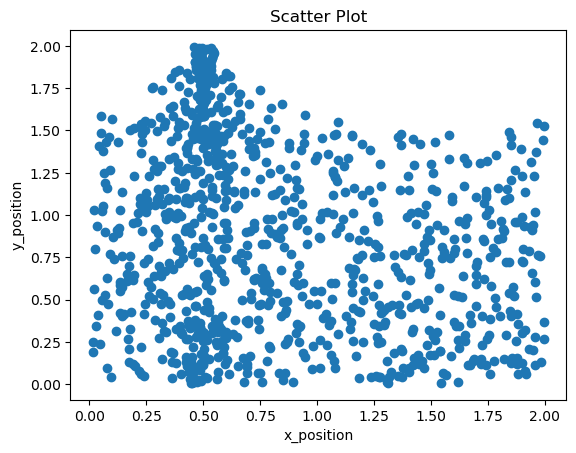

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'specific_column' and 'other_column' with the actual column names you want to visualize
plt.scatter(user_df['x_position'],user_df['y_position'])
plt.xlabel('x_position')
plt.ylabel('y_position')
plt.title('Scatter Plot')
plt.show()

In [24]:
import numpy as np

mecs_array = np.array(mecs)

def calculate_nearest_mec(group):
    distances = np.sqrt((group['x_position'].values[:, np.newaxis] - mecs_array[:, 0])**2 + (group['y_position'].values[:, np.newaxis] - mecs_array[:, 1])**2)
    nearest_mec_index = np.argmin(distances)
    group['nearest_mec'] = nearest_mec_index
    return group

user_df = user_df.groupby('userId').apply(calculate_nearest_mec)
user_df

,userId,nearest_mec,positions,request_movie_ids,request_service_ids,x_position,y_position
0,0,3,"(1.2708476856273, 0.0404147496154)",[5415],[54],1.270848,0.040415
1,1,4,"(0.5325795657055, 0.5566496055663)",[1085],[39],0.532580,0.556650
2,2,4,"(1.4442146972739, 1.0162710072458)",[382],[4],1.444215,1.016271
3,3,6,"(1.8182290716448, 0.146630324578)",[2923],[3],1.818229,0.146630
4,4,3,"(0.8307021888871, 0.0666137586973)",[897],[7],0.830702,0.066614
...,...,...,...,...,...,...,...
995,995,1,"(0.3491569656437, 1.0952832152958)",[],[],0.349157,1.095283
996,996,0,"(0.4789180657953, 0.0271162959198)",[],[],0.478918,0.027116
997,997,3,"(1.4445589470291, 0.4794295893571)",[],[],1.444559,0.479430
998,998,4,"(0.9212272124508, 1.1509886596992)",[],[],0.921227,1.150989


In [25]:
# time_t1, time_interval 모두 timestamp 형태

import pandas as pd
import numpy as np

def make_request_list(dataframe, now, time_interval):
    now_datetime = pd.to_datetime(now, unit='s')
    end_datetime = now_datetime + pd.Timedelta(hours=time_interval)
    request_df = dataframe[(pd.to_datetime(dataframe['timestamp'], unit='s') >= now_datetime) & (pd.to_datetime(dataframe['timestamp'], unit='s') <= end_datetime)]
    end_time = int(end_datetime.timestamp())
    return request_df, end_time

now = start_timestamp  # 현재 시간(timestamp)
time_interval = 6  # 시간 간격(hours 단위)
ex_rating_df = month_rating_df.copy()

In [26]:
request_df, end_time = make_request_list(ex_rating_df, now, time_interval)

print("Request DataFrame:")
print("End Time:", end_time)
request_df

Request DataFrame:
End Time: 1572555600


,userId,movieId,rating,timestamp,remapped_movieId
264,847,69761,5.0,1572552852,5415
329,1696,4489,4.5,1572547031,1085
330,1696,54272,4.0,1572547009,382
984,4825,3639,3.0,1572536938,2923
985,4825,5872,2.5,1572536853,897
...,...,...,...,...,...
64346,154484,71304,3.5,1572552887,1858
66030,158539,6502,4.0,1572543089,218
66098,158539,165603,4.5,1572546517,872
66109,158539,179085,4.0,1572543076,1121


In [27]:
# Function to map request_movie_ids based on nearest_mec
def map_movie_ids_to_service_ids(row):
    nearest_mec = row['nearest_mec']
    request_movie_ids = row['request_movie_ids']

    if 0 <= nearest_mec < len(service_id_per_mec):
        service_dict = service_id_per_mec[nearest_mec]

        request_service_ids = []
        for request_movie_id in request_movie_ids:
            try: # Y=1 인 경우 하위 80프로 movieId는 할당되는 service가 없음 -> except문 처리 
                request_service_id = service_dict[request_movie_id]
                request_service_ids.append(request_service_id)
            except:
                continue

    return request_service_ids

In [28]:
import pandas as pd
from PIL import Image

end_time = now

# Determine the maximum values for creating the matrix
max_nearest_mec = number_of_mecs
max_request_service_id = number_of_service_Ids

if case == '1':
    print('case :',case)
    # Map the values to create a new column 'service_id' based on remapped_movieId
    ex_rating_df['service_id'] = ex_rating_df['remapped_movieId'].map(mapping_dict)
    ex_rating_df['service_id'] = ex_rating_df['service_id'].astype(int)    

elif case == '2' or case == '3' or case == '4' or case == '5':
    print('case :',case)

else:
    print('input wrong case !!')

case : 5


In [29]:
ex_rating_df

,userId,movieId,rating,timestamp,remapped_movieId
0,4,1,3.0,1573944252,75
1,4,260,3.5,1573938415,9
2,4,296,4.0,1573938898,13
3,4,541,4.5,1573944303,86
4,4,589,4.0,1573939042,89
...,...,...,...,...,...
67396,162190,204698,1.5,1573824042,0
67397,162257,204698,3.0,1573410931,0
67398,162305,204692,1.5,1573107264,1024
67399,162516,179749,3.0,1572577455,2174


In [30]:
time_interval = 6
number_of_image_per_day = int(24/time_interval)
number_of_days_for_prediction = 21

number_of_prediction = number_of_image_per_day * number_of_days_for_prediction
number_of_prediction

84

In [31]:
request_list = [[[] for _ in range(number_of_mecs)] for _ in range(number_of_prediction)]
test_time_slot = 0
def record_request_list(row):
    nearest_mec = row['nearest_mec']
    service_ids = row['request_service_ids']
    for service_id in service_ids:
        request_list[test_time_slot][nearest_mec].append(service_id)

In [32]:
num

1216

In [33]:
from scipy.spatial.distance import cdist

end_time = now

while end_time < end_timestamp:
    if case == '1':
        request_df, end_time = make_request_list(ex_rating_df, end_time, time_interval)
        
        # Create a dictionary to map user IDs to their corresponding service_ids
        request_df['userId'] = [i%number_of_sample_users for i in range(len(request_df))]
        user_service_mapping = request_df.groupby('userId')['service_id'].apply(list).to_dict()
        
        # Update the 'request_service_ids' column in user_df
        user_df['request_service_ids'] = user_df['userId'].map(user_service_mapping)
        user_df['request_service_ids'] = user_df['request_service_ids'].fillna("").apply(list)
        
    elif case == '2':
        request_df, end_time = make_request_list(ex_rating_df, end_time, time_interval)
        
        # Create a dictionary to map user IDs to their corresponding service_ids
        request_df['userId'] = [i%number_of_sample_users for i in range(len(request_df))]
        user_movie_mapping = request_df.groupby('userId')['remapped_movieId'].apply(list).to_dict()
    
        # Update the 'request_service_ids' column in user_df
        user_df['request_movie_ids'] = user_df['userId'].map(user_movie_mapping)
        user_df['request_movie_ids'] = user_df['request_movie_ids'].fillna("").apply(list)
    
        # Apply the mapping function to the DataFrame
        user_df['request_service_ids'] = user_df.apply(map_movie_ids_to_service_ids, axis=1)
        
    elif case == '3':
        request_df, end_time = make_request_list(ex_rating_df, end_time, time_interval)
        
        # Create a dictionary to map user IDs to their corresponding service_ids
        request_df['userId'] = [i%number_of_sample_users for i in range(len(request_df))]
        user_movie_mapping = request_df.groupby('userId')['remapped_movieId'].apply(list).to_dict()

        # Update the 'request_service_ids' column in user_df
        user_df['request_movie_ids'] = user_df['userId'].map(user_movie_mapping)
        user_df['request_movie_ids'] = user_df['request_movie_ids'].fillna("").apply(list)
    
        # Apply the mapping function to the DataFrame
        user_df['request_service_ids'] = user_df.apply(map_movie_ids_to_service_ids, axis=1)
        
        # Step 1: Create empty groups
        groups = [[] for _ in range(64)]
    
        # Step 2: Populate groups based on values
        for key, value in mapping_dict.items():
            groups[value].append((key))
    
        # Step 3: Update service_id_per_mec
        service_id_per_mec = []
        for mec in range(number_of_mecs):
            random.shuffle(groups)
    
            mapping_dict = {}
            for service_id, keys in enumerate(groups):
                for key in keys:
                    mapping_dict[key] = service_id
    
            service_id_per_mec.append(mapping_dict)

    
    elif case == '4':
        try:
            user_df = pd.read_csv('./case4_user_mobility/timeslot_'+str(num)+'.csv')
            user_df['positions'] = user_df['positions'].apply(lambda x: ast.literal_eval(x))
            user_df['request_service_ids'] = user_df['request_service_ids'].apply(lambda x: ast.literal_eval(x))
        except:
            print('now : ',num)
            break
            
    elif case == '5':
        try:
            user_df = pd.read_csv(csv_path+'/timeslot_'+str(num)+'.csv')
            user_df['positions'] = user_df['positions'].apply(lambda x: ast.literal_eval(x))
            user_df['request_service_ids'] = user_df['request_service_ids'].apply(lambda x: ast.literal_eval(x))
        except:
            print('now : ',num)
            break
            


    user_df.apply(record_request_list, axis=1)
    
    if num == 1216: # 11/01 heatmap 임시저장
        print('time slot:',end_time,str(datetime.datetime.fromtimestamp(end_time)))
        # Initialize the matrix with zeros
        matrix = np.zeros((max_nearest_mec, max_request_service_id), dtype=int)
    
        # Populate the matrix based on the DataFrame
        for _, row in user_df.iterrows():
            nearest_mec = row['nearest_mec']
            request_service_ids = row['request_service_ids']
    
            for service_id in request_service_ids:
                matrix[nearest_mec][service_id] += 1
    
        normalized_matrix = matrix / matrix.max(axis=1, keepdims=True)
        print(user_df)
        
    num+=1
    test_time_slot+=1

time slot: 1572534000 2019-11-01 00:00:00
     userId  nearest_mec                           positions  \
0         0            3  (1.2708476856273, 0.0404147496154)   
1         1            4  (0.5325795657055, 0.5566496055663)   
2         2            4  (1.4442146972739, 1.0162710072458)   
3         3            6   (1.8182290716448, 0.146630324578)   
4         4            3  (0.8307021888871, 0.0666137586973)   
..      ...          ...                                 ...   
995     995            1  (0.3491569656437, 1.0952832152958)   
996     996            0  (0.4789180657953, 0.0271162959198)   
997     997            3  (1.4445589470291, 0.4794295893571)   
998     998            4  (0.9212272124508, 1.1509886596992)   
999     999            4    (0.5765179689462, 0.73978162914)   

    request_movie_ids request_service_ids  
0              [5415]                [54]  
1              [1085]                [39]  
2               [382]                 [4]  
3            

In [34]:
len(request_list)

84

In [35]:
len(request_list[0])

9

In [36]:
len(request_list[-1][0])

3

In [37]:
tmp = user_df[user_df['nearest_mec'] == 0]
tmp

,userId,nearest_mec,positions,request_movie_ids,request_service_ids
14,14,0,"(0.2742779121345, 0.4614625616746)",[],[]
18,18,0,"(0.088383247268, 0.4257852014589)",[],[]
35,35,0,"(0.0336153149767, 0.3039280504105)",[],[]
59,59,0,"(0.2454391632483, 0.2459996667837)",[],[]
66,66,0,"(0.4055962513497, 0.3075995532916)",[],[]
...,...,...,...,...,...
944,944,0,"(0.3113536666625, 0.3682248879783)",[],[]
973,973,0,"(0.0336754019062, 0.0441047011019)",[],[]
980,980,0,"(0.4702895717181, 0.150682593557)",[],[]
981,981,0,"(0.4490761143411, 0.380734391384)",[],[]


In [38]:
normalized_matrix

array([[0.1875    , 0.0625    , 0.0625    , 0.        , 0.        ,
        0.0625    , 0.        , 0.        , 0.1875    , 0.0625    ,
        0.        , 0.0625    , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.125     ,
        0.        , 0.4375    , 0.        , 0.        , 0.        ,
        0.        , 0.125     , 0.0625    , 1.        , 0.        ,
        0.        , 0.        , 0.0625    , 0.        , 0.        ,
        0.0625    , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.25      , 0.        , 0.        , 0.125     , 0.        ,
        0.0625    , 0.        , 0.0625    , 0.0625    , 0.0625    ,
        0.        , 0.        , 0.3125    , 0.        ],
       [0.17241379, 0.06896552, 0.03448276, 0.06896552, 0.        ,
        0.4137931 , 0.        , 0.        , 1.        , 0. 

In [39]:
time_slot_image = Image.fromarray((255 * normalized_matrix).astype(np.uint8), mode='L')
time_slot_image = np.array(time_slot_image)
time_slot_image / 255

array([[0.18431373, 0.05882353, 0.05882353, 0.        , 0.        ,
        0.05882353, 0.        , 0.        , 0.18431373, 0.05882353,
        0.        , 0.05882353, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12156863,
        0.        , 0.43529412, 0.        , 0.        , 0.        ,
        0.        , 0.12156863, 0.05882353, 1.        , 0.        ,
        0.        , 0.        , 0.05882353, 0.        , 0.        ,
        0.05882353, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.24705882, 0.        ,
        0.24705882, 0.        , 0.        , 0.12156863, 0.        ,
        0.05882353, 0.        , 0.05882353, 0.05882353, 0.05882353,
        0.        , 0.        , 0.30980392, 0.        ],
       [0.16862745, 0.06666667, 0.03137255, 0.06666667, 0.        ,
        0.41176471, 0.        , 0.        , 1.        , 0. 

# Data Load

In [40]:
import os
import numpy as np
from PIL import Image
import natsort

if case == '5':
    file_path = "./heatmap_case5_0.2_speed"+str(max_speed)
else:
    file_path = './heatmap_case'+case+'_0.2'
    
file_list = os.listdir(file_path)
file_list = natsort.natsorted(file_list, key=None, reverse=False, alg=0)

num_of_files = len(file_list)

# Assuming all images have the same height and width
first_image = Image.open(os.path.join(file_path, file_list[0]))
height, width = np.array(first_image).shape

# Create an empty NumPy array to store the images
image_array = np.empty((num_of_files, height, width))

# Iterate through the file list and load images
for i, file_name in enumerate(file_list):
    if i < 5:
        print(file_name)
    image = Image.open(os.path.join(file_path, file_name))
    image_array[i] = np.array(image)

# image_array now contains the images as NumPy arrays
print(image_array.shape)  # (num_of_files, height, width)
print(file_list[:10])

train0.png
train1.png
train2.png
train3.png
train4.png
(1300, 9, 64)
['train0.png', 'train1.png', 'train2.png', 'train3.png', 'train4.png', 'train5.png', 'train6.png', 'train7.png', 'train8.png', 'train9.png']


In [41]:
import os
import numpy as np
from PIL import Image

window_size = int(input())
num_of_frames = window_size+1  # Specify the desired number of frames

# Assuming all images have the same height and width
first_image = Image.open(os.path.join(file_path, file_list[0]))
height, width = np.array(first_image).shape[:2]

# Create an empty NumPy array to store the images
dataset = np.empty((num_of_files-num_of_frames+1, num_of_frames, height, width))

# Iterate through the file list and load images
for i in range(num_of_files-num_of_frames+1):
    frame_images = file_list[i : i+num_of_frames]
    for j, file_name in enumerate(frame_images):
        if i < 2:
            print(file_name)
        image = Image.open(os.path.join(file_path, file_name))
        dataset[i, j] = np.array(image)
    if i < 2:
        print()

# dataset now contains the images bound into frames
print(dataset.shape)  # (num_of_files // num_of_frames, num_of_frames, height, width)

 12


train0.png
train1.png
train2.png
train3.png
train4.png
train5.png
train6.png
train7.png
train8.png
train9.png
train10.png
train11.png
train12.png

train1.png
train2.png
train3.png
train4.png
train5.png
train6.png
train7.png
train8.png
train9.png
train10.png
train11.png
train12.png
train13.png

(1288, 13, 9, 64)


In [42]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)
dataset.shape #(num_of_samples, frames, height, width, channels)

(1288, 13, 9, 64, 1)

In [43]:
time_interval = 6
number_of_image_per_day = int(24/time_interval)
number_of_days_for_prediction = 21

number_of_prediction = number_of_image_per_day * number_of_days_for_prediction
number_of_prediction

84

In [44]:
test_dataset = dataset[-number_of_prediction:,...]

# Normalize the data to the 0-1 range.
test_dataset = test_dataset / 255
print('test dataset : ', test_dataset.shape)

test dataset :  (84, 13, 9, 64, 1)


# Validation created heatmap with request matrix

In [45]:
K = 8

def find_top_k_indices(matrix):
    result = []
    if len(matrix.shape) == 2: # matrix인 경우
        for row in matrix:
            mecs_top_k = []
            # (인덱스, 값) 쌍으로 이루어진 리스트를 생성합니다.
            indices_values = [(index, value) for index, value in enumerate(row)]
            #print(indices_values)
            # 값에 따라 정렬합니다. (큰 값이 먼저 오도록)
            sorted_indices_values = sorted(indices_values, key=lambda x: x[1], reverse=True)
            # 상위 32개의 인덱스를 결과에 추가합니다.
            top_indices = [index for index, _ in sorted_indices_values[:K]]
            mecs_top_k.extend(top_indices)
            result.append(mecs_top_k)
        return result
    
    elif len(matrix.shape) == 1: # list 인 경우 
        indices_values = [(index, value) for index, value in enumerate(matrix)]
        sorted_indices_values = sorted(indices_values, key=lambda x:x[1], reverse=True)
        top_indices = [index for index,_ in sorted_indices_values[:K]]
        result.extend(top_indices)

        return result

In [46]:
top_k_normalized = np.array(find_top_k_indices(normalized_matrix))
top_k_normalized

array([[33, 26, 62, 48, 50,  0,  8, 24],
       [ 8,  5, 53, 16,  0, 62, 15, 43],
       [26,  4, 22,  8, 59, 11, 10, 15],
       [33, 63,  4, 28, 30, 21, 18, 58],
       [21, 58, 26, 42,  4, 53,  7,  0],
       [ 4, 26, 50,  8, 53, 58,  0,  1],
       [ 5, 25,  8, 22, 28, 29, 34, 40],
       [ 5, 22, 16,  0,  1,  4, 24, 19],
       [22,  0,  1,  2,  3,  4,  5,  6]])

In [47]:
top_k_image = np.array(find_top_k_indices(test_dataset[0][-1].squeeze()))
top_k_image

array([[33, 26, 62, 48, 50,  0,  8, 24],
       [ 8,  5, 53, 16,  0, 62, 15, 43],
       [26,  4, 22,  8, 59, 11, 10, 15],
       [33, 63,  4, 28, 30, 21, 18, 58],
       [21, 58, 26, 42,  4, 53,  7,  0],
       [ 4, 26, 50,  8, 53, 58,  0,  1],
       [ 5, 25,  8, 22, 28, 29, 34, 40],
       [ 5, 22, 16,  0,  1,  4, 24, 19],
       [22,  0,  1,  2,  3,  4,  5,  6]])

In [48]:
np.array_equal(top_k_normalized, top_k_image) # png save and reload : occur loss, but no affect to top k

True

# Hit rate

In [49]:
import numpy as np

def create_shifted_frames(data, mec_index): # data = (frames, mecs, movieId, gray_scale)
    tmp_data = data[:,mec_index,:,:]
    tmp_data = np.squeeze(tmp_data)
    tmp_data = tmp_data.transpose()
    print(tmp_data.shape)

    return tmp_data

In [50]:
from IPython.display import clear_output

X_test = [[] for _ in range(test_dataset.shape[2])]
Y_test = [[] for _ in range(test_dataset.shape[2])]

for day_index, oneday_dataset in enumerate(test_dataset):
    for mec_index in range(oneday_dataset.shape[1]):
        clear_output(wait=True)
        print(day_index, ' test ...')
        
        try:
            if mec_index != observe_mec_index:
                continue
        except:
            print('no observe mec index')

        print(mec_index,' 번째 mec 데이터 생성중 ...')
        frame_dataset = create_shifted_frames(oneday_dataset, mec_index)
        print('frame shape : ', frame_dataset.shape)

        X,Y = np.empty((1,window_size,1)), np.empty((1))
        for movieId_index, movieId in enumerate(frame_dataset):
            print(movieId_index, ' movie  test ... ', movieId.shape)
            x = movieId[:-1]
            x = np.array([[x[i] for i in range(j,j+window_size)] for j in range(len(x)-window_size+1)])
            y = movieId[window_size:]
            x = np.expand_dims(x, axis=-1)
            #print('final X,Y shape : ',  x.shape, y.shape)
            X = np.append(X,x, axis=0)
            Y = np.append(Y,y, axis=0)

        X = np.delete(X, 0, axis=0)
        Y = np.delete(Y, 0, axis=0)
        try:
            X_test[mec_index].extend(X)
            Y_test[mec_index].extend(Y)
        except:
            X_test[mec_index] = np.append(X_test[mec_index], X, axis=0)
            Y_test[mec_index] = np.append(Y_test[mec_index], Y, axis=0)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape, Y_test.shape)

83  test ...
no observe mec index
8  번째 mec 데이터 생성중 ...
(64, 13)
frame shape :  (64, 13)
0  movie  test ...  (13,)
1  movie  test ...  (13,)
2  movie  test ...  (13,)
3  movie  test ...  (13,)
4  movie  test ...  (13,)
5  movie  test ...  (13,)
6  movie  test ...  (13,)
7  movie  test ...  (13,)
8  movie  test ...  (13,)
9  movie  test ...  (13,)
10  movie  test ...  (13,)
11  movie  test ...  (13,)
12  movie  test ...  (13,)
13  movie  test ...  (13,)
14  movie  test ...  (13,)
15  movie  test ...  (13,)
16  movie  test ...  (13,)
17  movie  test ...  (13,)
18  movie  test ...  (13,)
19  movie  test ...  (13,)
20  movie  test ...  (13,)
21  movie  test ...  (13,)
22  movie  test ...  (13,)
23  movie  test ...  (13,)
24  movie  test ...  (13,)
25  movie  test ...  (13,)
26  movie  test ...  (13,)
27  movie  test ...  (13,)
28  movie  test ...  (13,)
29  movie  test ...  (13,)
30  movie  test ...  (13,)
31  movie  test ...  (13,)
32  movie  test ...  (13,)
33  movie  test ...  (13,)
34 

# Model Load

In [84]:
K = 8

def find_top_k_indices(matrix):
    result = []
    if len(matrix.shape) == 2: # matrix인 경우
        for row in matrix:
            mecs_top_k = []
            # (인덱스, 값) 쌍으로 이루어진 리스트를 생성합니다.
            indices_values = [(index, value) for index, value in enumerate(row)]
            # 값에 따라 정렬합니다. (큰 값이 먼저 오도록)
            sorted_indices_values = sorted(indices_values, key=lambda x: x[1], reverse=True)
            # 상위 K개의 인덱스를 결과에 추가합니다.
            top_indices = [index for index, _ in sorted_indices_values[:K]]
            mecs_top_k.extend(top_indices)
            result.append(mecs_top_k)
    
    elif len(matrix.shape) == 1: # list 인 경우 
        indices_values = [(index, value) for index, value in enumerate(matrix)]
        sorted_indices_values = sorted(indices_values, key=lambda x:x[1], reverse=True)
        top_indices = [index for index,_ in sorted_indices_values[:K]]
        result.extend(top_indices)

    return result

# ConvLSTM

In [52]:
from tensorflow import keras

if case == '5':
    convlstm= keras.models.load_model('./convlstm_models/convlstm_windowsize'+str(window_size)+'_'+file_path[10:])
else:
    convlstm= keras.models.load_model('./convlstm_models/convlstm_windowsize'+str(window_size)+'_'+file_path[-9:])
convlstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 9, 64, 1)]  0         
                                                                 
 conv_lst_m2d (ConvLSTM2D)   (None, None, 9, 64, 64)   416256    
                                                                 
 batch_normalization (BatchN  (None, None, 9, 64, 64)  256       
 ormalization)                                                   
                                                                 
 conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 9, 64, 64)  295168    
                                                                 
 batch_normalization_1 (Batc  (None, None, 9, 64, 64)  256       
 hNormalization)                                                 
                                                                 
 conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 9, 64, 64)  33024 

In [53]:
def predict_next_frames(model, example, num_of_frames):

    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(example[:-1], axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    print('model input shape : ', np.expand_dims(example[:-1], axis=0).shape)
    print('model output shape : ', predicted_frame.shape)

    return predicted_frame

In [54]:
# Select a random example from the testidation dataset.
np.random.seed(42)
convlstm_truths = []
convlstm_predictions = []

for test_index in range(test_dataset.shape[0]): # 모든 test_dataset에 대해 predict
    example = test_dataset[test_index]
    print(test_index,'번째 example shape : ', example.shape)

    original_frame = example[-1,...]
    new_prediction = predict_next_frames(convlstm, example, num_of_frames)

    original_frame = np.squeeze(original_frame)
    new_prediction = np.squeeze(new_prediction)

    convlstm_truths.append(original_frame)
    convlstm_predictions.append(new_prediction)

convlstm_truths = np.array(convlstm_truths)
convlstm_predictions = np.array(convlstm_predictions)
print(convlstm_truths.shape, convlstm_predictions.shape)

0 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 1s 636ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
1 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 169ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
2 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 173ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
3 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 168ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
4 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 170ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
5 번째 example shape :  (13, 9, 64, 1)
1/1 [==============================] - 0s 167ms/step
model input shape :  (1, 12, 9, 64, 1)
model output shape :  (1, 9, 64, 1)
6 번째 examp

In [55]:
tmp_truths = [[] for _ in range(test_dataset.shape[2])]
tmp_predictions = [[] for _ in range(test_dataset.shape[2])]

for convlstm_truth, convlstm_prediction in zip(convlstm_truths, convlstm_predictions):
    for idx, row in enumerate(convlstm_truth):
        tmp_truths[idx].extend(row)
        
    for idx, row in enumerate(convlstm_prediction):
        tmp_predictions[idx].extend(row)

tmp_truths = np.array(tmp_truths)
tmp_predictions = np.array(tmp_predictions)

convlstm_truths, convlstm_predictions = tmp_truths, tmp_predictions
print(convlstm_truths.shape, convlstm_predictions.shape)

(9, 5376) (9, 5376)


In [85]:
np.random.seed(42)
convlstm_total_hits_list = [[] for _ in range(number_of_mecs)] # mecs수 만큼 빈 객체 생성
convlstm_truths_hits_list = [[] for _ in range(number_of_mecs)] # mecs수 만큼 빈 객체 생성
convlstm_predicts_hits_list = [[] for _ in range(number_of_mecs)] # mecs수 만큼 빈 객체 생성

time_slot = 0

for i in range(0, Y_test.shape[1], test_dataset.shape[3]):
    truths = convlstm_truths[:,i:i+test_dataset.shape[3]] # 64개씩 짤라서 matrix(=image) 생성
    prediction = convlstm_predictions[:, i:i+test_dataset.shape[3]]

    top_k_truths = find_top_k_indices(truths)
    top_k_predicts = find_top_k_indices(prediction)

    total_requests = request_list[time_slot]

    for mecs, requests_per_mec in enumerate(total_requests):
        truths_hits, predicts_hits = 0,0
        total = 0
        for request_per_mec in requests_per_mec:
            if request_per_mec in top_k_truths[mecs]:
                truths_hits+=1
            if request_per_mec in top_k_predicts[mecs]:
                predicts_hits+=1
            total+=1

        convlstm_total_hits_list[mecs].append(total)
        convlstm_truths_hits_list[mecs].append(truths_hits)
        convlstm_predicts_hits_list[mecs].append(predicts_hits)

    time_slot+=1
    
print('hit rate log 개수 : ', len(convlstm_total_hits_list))
print('hit rate log 개수 : ', len(convlstm_total_hits_list[0]))

hit rate log 개수 :  9
hit rate log 개수 :  84


In [86]:
convlstm_total_hits_list = np.array(convlstm_total_hits_list)
convlstm_truths_hits_list = np.array(convlstm_truths_hits_list)
convlstm_predicts_hits_list = np.array(convlstm_predicts_hits_list)

# avoid number of request is 0 in time slot t
convlstm_ratio_correct_per_truths = np.nan_to_num((convlstm_predicts_hits_list / convlstm_truths_hits_list * 100), nan=0.0)

# LSTM

In [58]:
import tensorflow as tf
from tensorflow import keras

with tf.device("/gpu:0"):
    predictions = [[] for _ in range(test_dataset.shape[2])]
    for mec_index in range(test_dataset.shape[2]): # mecs만큼 반복
        print(mec_index,'mec 예측중 ...')
        if case == '5':
            model = keras.models.load_model('./rnn_models/MEC'+str(mec_index)+'rnn_'+file_path[10:])
        else:
            model = keras.models.load_model('./rnn_models/MEC'+str(mec_index)+'rnn_'+file_path[-9:])
        predictions[mec_index].extend(model.predict(X_test[mec_index], verbose=0))
    predictions = np.array(predictions)
    print(predictions.shape)

0 mec 예측중 ...
1 mec 예측중 ...
2 mec 예측중 ...
3 mec 예측중 ...
4 mec 예측중 ...
5 mec 예측중 ...
6 mec 예측중 ...
7 mec 예측중 ...
8 mec 예측중 ...
(9, 5376, 1, 1)


In [59]:
predictions = predictions.squeeze()
predictions.shape

(9, 5376)

In [87]:
np.random.seed(42)
total_hits_list = [[] for _ in range(number_of_mecs)] # mecs수 만큼 빈 객체 생성
truths_hits_list = [[] for _ in range(number_of_mecs)] # mecs수 만큼 빈 객체 생성
predicts_hits_list = [[] for _ in range(number_of_mecs)] # mecs수 만큼 빈 객체 생성

time_slot = 0

tmp_top_k_truths = 0
tmp_top_k_predicts = 0

for i in range(0, Y_test.shape[1], test_dataset.shape[3]):
    truths = Y_test[:,i:i+test_dataset.shape[3]] # 64개씩 짤라서 matrix(=image) 생성
    prediction = predictions[:, i:i+test_dataset.shape[3]]

    top_k_truths = find_top_k_indices(truths)
    top_k_predicts = find_top_k_indices(prediction)
    if i == 0:
        tmp_top_k_truths = find_top_k_indices(truths)
        tmp_top_k_predicts = find_top_k_indices(prediction)

    total_requests = request_list[time_slot]

    for mecs, requests_per_mec in enumerate(total_requests):
        truths_hits, predicts_hits = 0,0
        total = 0
        for request_per_mec in requests_per_mec:
            if request_per_mec in top_k_truths[mecs]:
                truths_hits+=1
            if request_per_mec in top_k_predicts[mecs]:
                predicts_hits+=1
            total+=1

        total_hits_list[mecs].append(total)
        truths_hits_list[mecs].append(truths_hits)
        predicts_hits_list[mecs].append(predicts_hits)

    time_slot+=1
    
print('hit rate log 개수 : ', len(total_hits_list))
print('hit rate log 개수 : ', len(total_hits_list[0]))

hit rate log 개수 :  9
hit rate log 개수 :  84


In [88]:
total_hits_list = np.array(total_hits_list)
truths_hits_list = np.array(truths_hits_list)
predicts_hits_list = np.array(predicts_hits_list)

# avoid number of request is 0 in time slot t
ratio_correct_per_truths = np.nan_to_num((predicts_hits_list / truths_hits_list * 100), nan=0.0)

In [89]:
truths_hits_rate = np.mean(np.nan_to_num((truths_hits_list / total_hits_list * 100), nan=0.0), axis=1)
predicts_hits_rate = np.mean(np.nan_to_num((predicts_hits_list / total_hits_list * 100), nan=0.0), axis=1)
convlstm_truths_hits_rate = np.mean(np.nan_to_num((convlstm_truths_hits_list / convlstm_total_hits_list * 100), nan=0.0), axis=1)
convlstm_predicts_hits_rate = np.mean(np.nan_to_num((convlstm_predicts_hits_list / convlstm_total_hits_list * 100), nan=0.0), axis=1)

print('truths hit rate(mean) per mecs  : ', truths_hits_rate)
print('total truths hit rate mean, stddev : ', np.mean(truths_hits_rate), np.std(truths_hits_rate))
print()
print('ConvLSTM truths hit rate(mean) per mecs : ', convlstm_truths_hits_rate)
print('total truths hit rate mean, stddev : ', np.mean(convlstm_truths_hits_rate), np.std(convlstm_truths_hits_rate))
print()
print('convlstm predicts hit rate(mean) per mecs : ', convlstm_predicts_hits_rate)
print('total ConvLSTM hit rate mean, stddev : ', np.mean(convlstm_predicts_hits_rate), np.std(convlstm_predicts_hits_rate))
print()
print('LSTM predicts hit rate(mean) per mecs : ', predicts_hits_rate)
print('total LSTM hit rate mean, stddev : ', np.mean(predicts_hits_rate), np.std(predicts_hits_rate))
print()
print('convlstm/truths predicts hit rate(mean) per mecs : ', np.mean(convlstm_ratio_correct_per_truths, axis=1))
print('total ConvLSTM hit rate mean, stddev : ', np.mean(np.mean(convlstm_ratio_correct_per_truths, axis=1)), np.std(np.mean(convlstm_ratio_correct_per_truths, axis=1)))
print()
print('LSTM/truths predicts hit rate(mean) per mecs : ', np.mean(ratio_correct_per_truths, axis=1))
print('total LSTM hit rate mean, stddev : ', np.mean(np.mean(ratio_correct_per_truths, axis=1)), np.std(np.mean(ratio_correct_per_truths, axis=1)))
print()

truths hit rate(mean) per mecs  :  [63.70040985 59.49034434 59.90936504 58.27179805 59.51525881 58.16588447
 63.92656666 59.60207077 61.45829419]
total truths hit rate mean, stddev :  60.44888801984118 2.012075316933903

ConvLSTM truths hit rate(mean) per mecs :  [63.70040985 59.49034434 59.90936504 58.27179805 59.51525881 58.16588447
 63.92656666 59.60207077 61.45829419]
total truths hit rate mean, stddev :  60.44888801984118 2.012075316933903

convlstm predicts hit rate(mean) per mecs :  [51.16289491 51.24503578 43.2175544  50.55775738 54.09144245 49.19508704
 46.45543652 49.39121844 45.41675082]
total ConvLSTM hit rate mean, stddev :  48.97035308387331 3.1798331513920077

LSTM predicts hit rate(mean) per mecs :  [47.07885583 46.64219947 39.10997405 48.0699551  51.98400173 43.99175261
 42.88644605 45.01218518 42.15996919]
total LSTM hit rate mean, stddev :  45.21503768864872 3.544090488792801

convlstm/truths predicts hit rate(mean) per mecs :  [80.23980476 84.92951095 72.72961418 86

# Hit rate
- number of test set : 84(=21 days in 6hours time interval)
- end timestamp : November 21

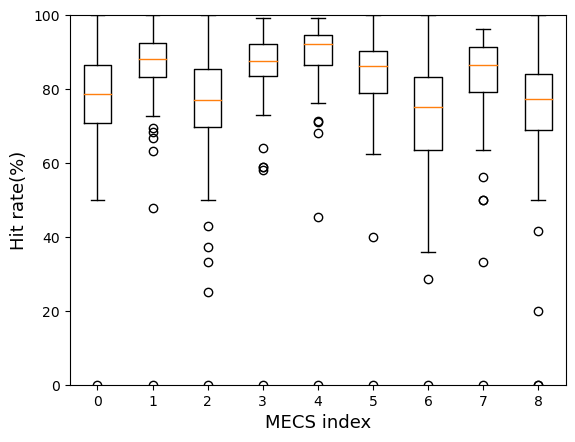

In [63]:
import matplotlib.pyplot as plt

# Create a list of labels for the 16 MECs (e.g., MEC_1, MEC_2, ..., MEC_16)
mec_labels = [f"{i}" for i in range(image_array.shape[1])]

# Create a figure and axis object for the boxplot
fig, ax = plt.subplots()

# Create the boxplot using the boxplot function
ax.boxplot(convlstm_ratio_correct_per_truths.T, labels=mec_labels)


# Set axis labels and title
ax.set_xlabel('MECS index', fontsize=13)
ax.set_ylabel('Hit rate(%)', fontsize=13)
plt.ylim(0,100)

# Save the plot.png
if case == '5':
    plt.savefig('./Figs/hit_rate/windowsize'+str(window_size)+'_'+file_path[10:]+'_K'+str(K)+'_ConvLSTM.png')
else:
    plt.savefig('./Figs/hit_rate/windowsize'+str(window_size)+'_'+file_path[-9:]+'_K'+str(K)+'_ConvLSTM.png')

# Show the plot
plt.show()

In [64]:
convlstm_truths_hits_rate = np.mean(np.nan_to_num((convlstm_truths_hits_list / convlstm_total_hits_list * 100), nan=0.0), axis=1)
convlstm_predicts_hits_rate = np.mean(np.nan_to_num((convlstm_predicts_hits_list / convlstm_total_hits_list * 100), nan=0.0), axis=1)

print('ConvLSTM truths hit rate(mean) per mecs : ', convlstm_truths_hits_rate)
print('total truths hit rate mean, stddev : ', np.mean(convlstm_truths_hits_rate), np.std(convlstm_truths_hits_rate))
print()
print('convlstm predicts hit rate(mean) per mecs : ', convlstm_predicts_hits_rate)
print('total ConvLSTM hit rate mean, stddev : ', np.mean(convlstm_predicts_hits_rate), np.std(convlstm_predicts_hits_rate))

ConvLSTM truths hit rate(mean) per mecs :  [83.91621413 79.85542938 82.48528009 78.15745422 77.23472543 77.92309089
 84.94305919 80.2629547  83.10031862]
total truths hit rate mean, stddev :  80.87539184976109 2.6689090082273426

convlstm predicts hit rate(mean) per mecs :  [64.8803702  69.01348049 61.33838585 67.51323574 69.32735543 65.43822475
 61.05884557 66.76535991 63.03341929]
total ConvLSTM hit rate mean, stddev :  65.37429746956707 2.9063130740756358


In [65]:
import pandas as pd
# Calculate the Q1, Q2 (mean), and Q3 values for each row
q1_values = np.percentile(convlstm_ratio_correct_per_truths, 25, axis=1)
q2_values = np.percentile(convlstm_ratio_correct_per_truths, 50, axis=1)
q3_values = np.percentile(convlstm_ratio_correct_per_truths, 75, axis=1)

# Create a Pandas DataFrame
df = pd.DataFrame({'Q1': q1_values, 'Q2 (Mean)': q2_values, 'Q3': q3_values})

# Print or use the DataFrame as needed
if case == '5':
    df.to_csv('./Figs/hit_rate/windowsize'+str(window_size)+'_'+file_path[10:]+'_K'+str(K)+'_ConvLSTM_hit_rate(Q1,Q2,Q3).csv')
else:
    df.to_csv('./Figs/hit_rate/windowsize'+str(window_size)+'_'+file_path[-9:]+'_K'+str(K)+'_ConvLSTM_hit_rate(Q1,Q2,Q3).csv')
#np.savetxt('./Figs/hit_rate/windowsize'+str(window_size)+'_'+file_path[-9:]+'_K'+str(K)+'_ConvLSTM_hit_rate(predict_div_truth).csv', convlstm_ratio_correct_per_truths, delimiter=',')

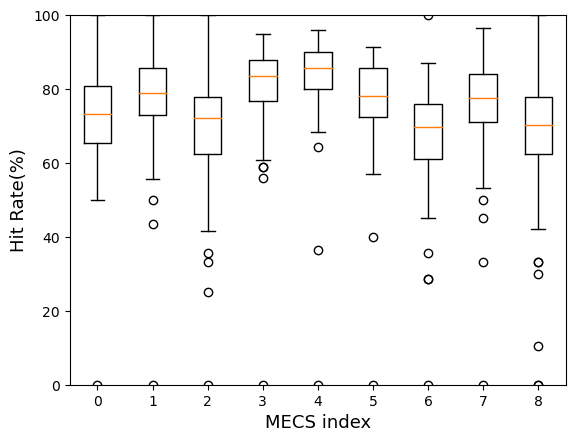

In [66]:
import matplotlib.pyplot as plt

# Create a list of labels for the 16 MECs (e.g., MEC_1, MEC_2, ..., MEC_16)
mec_labels = [f"{i}" for i in range(image_array.shape[1])]

# Create a figure and axis object for the boxplot
fig, ax = plt.subplots()

# Create the boxplot using the boxplot function
ax.boxplot(ratio_correct_per_truths.T, labels=mec_labels)

# Set axis labels and title
ax.set_xlabel('MECS index', fontsize=13)
ax.set_ylabel('Hit Rate(%)', fontsize=13)
plt.ylim(0,100)

# Save the plot.png
if case == '5':
    plt.savefig('./Figs/hit_rate/windowsize'+str(window_size)+'_'+file_path[10:]+'_K'+str(K)+'_LSTM.png')
else:
    plt.savefig('./Figs/hit_rate/'+file_path[-9:]+'_K'+str(K)+'_LSTM.png')

# Show the plot
plt.show()

In [67]:
import pandas as pd
# Calculate the Q1, Q2 (mean), and Q3 values for each row
q1_values = np.percentile(ratio_correct_per_truths, 25, axis=1)
q2_values = np.percentile(ratio_correct_per_truths, 50, axis=1)
q3_values = np.percentile(ratio_correct_per_truths, 75, axis=1)

# Create a Pandas DataFrame
df = pd.DataFrame({'Q1': q1_values, 'Q2 (Mean)': q2_values, 'Q3': q3_values})

# Print or use the DataFrame as needed
if case == '5':
    df.to_csv('./Figs/hit_rate/windowsize'+str(window_size)+'_'+file_path[10:]+'_K'+str(K)+'_LSTM_hit_rate(Q1,Q2,Q3).csv')
else:
    df.to_csv('./Figs/hit_rate/'+file_path[-9:]+'_K'+str(K)+'_LSTM_hit_rate.csv')

In [68]:
np.array_equal(ratio_correct_per_truths, convlstm_ratio_correct_per_truths)

False

# Timeseries Visualization

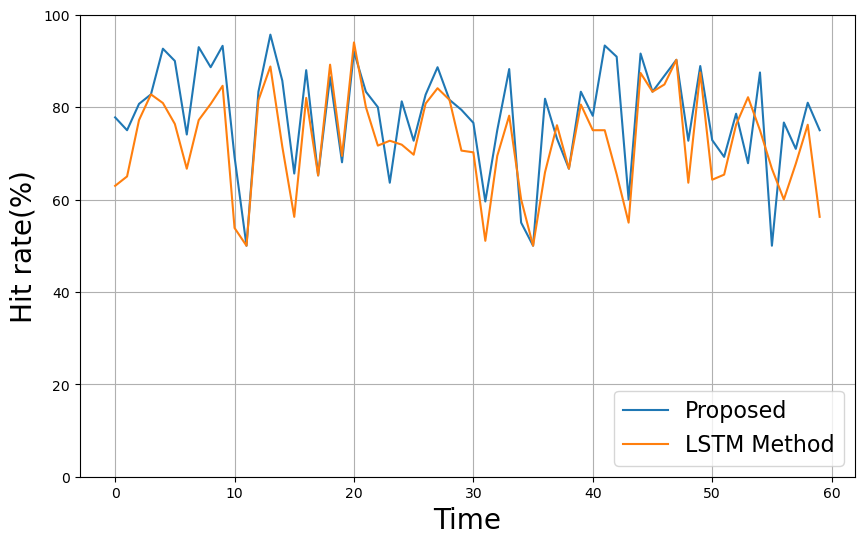

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = 0
number_of_predict_days = 60

plt.plot(range(number_of_predict_days), np.array(convlstm_ratio_correct_per_truths[observe_mec,:number_of_predict_days]), label='Proposed')
plt.plot(range(number_of_predict_days), np.array(ratio_correct_per_truths[observe_mec,:number_of_predict_days]), label='LSTM Method')


plt.xlabel('Time', fontsize=20)
plt.ylabel('Hit rate(%)', fontsize=20)
plt.ylim(0,100)
plt.legend(fontsize=16, loc='lower right')
plt.grid(True)

# Save the plot.png
if case == '5':
    plt.savefig('./Figs/TimeSeries/MEC_'+str(observe_mec)+'_'+file_path[10:]+'_K'+str(K)+'_TimeSeries.png')
else:
    plt.savefig('./Figs/TimeSeries/MEC_'+str(observe_mec)+'_'+file_path[-9:]+'_K'+str(K)+'_TimeSeries.png')

plt.show()


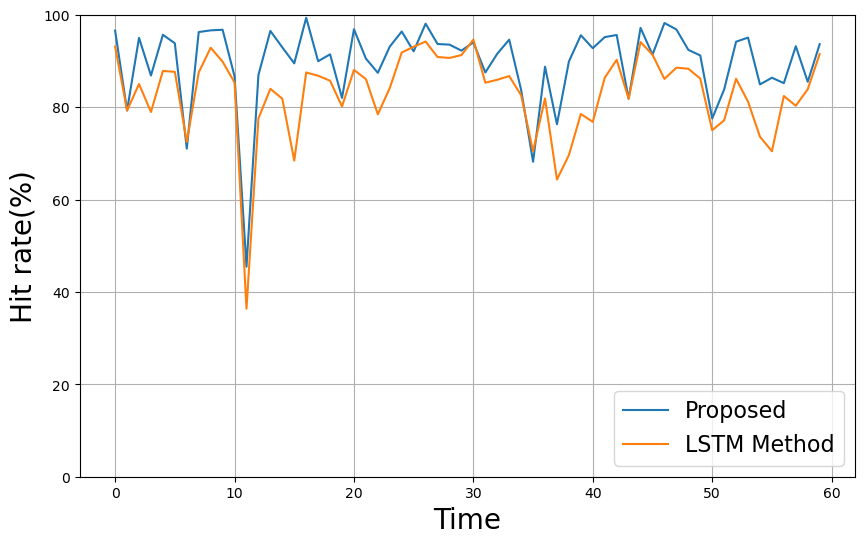

In [70]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = 4
number_of_predict_days = 60

plt.plot(range(number_of_predict_days), np.array(convlstm_ratio_correct_per_truths[observe_mec,:number_of_predict_days]), label='Proposed')
plt.plot(range(number_of_predict_days), np.array(ratio_correct_per_truths[observe_mec,:number_of_predict_days]), label='LSTM Method')


plt.xlabel('Time', fontsize=20)
plt.ylabel('Hit rate(%)', fontsize=20)
plt.ylim(0,100)
plt.legend(fontsize=16, loc='lower right')
plt.grid(True)

# Save the plot.png
if case == '5':
    plt.savefig('./Figs/TimeSeries/MEC_'+str(observe_mec)+'_'+file_path[10:]+'_K'+str(K)+'_TimeSeries.png')
else:
    plt.savefig('./Figs/TimeSeries/MEC_'+str(observe_mec)+'_'+file_path[-9:]+'_K'+str(K)+'_TimeSeries.png')

plt.show()


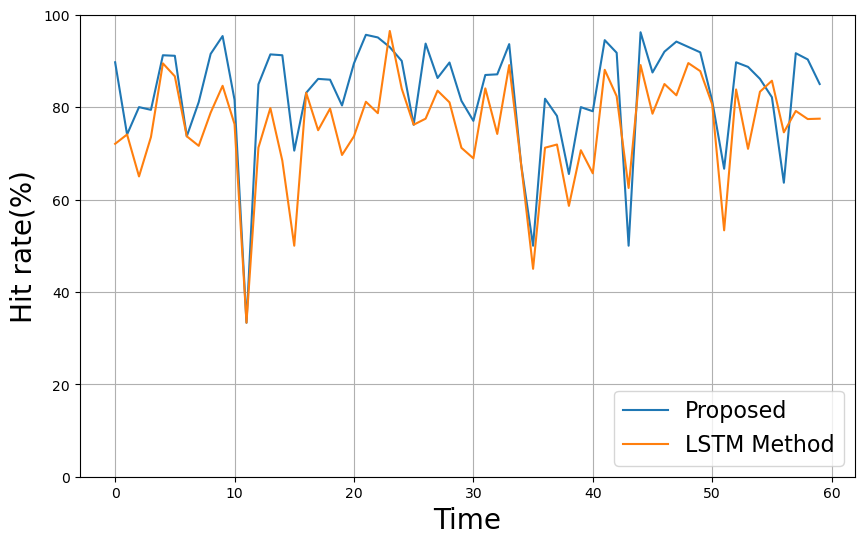

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

observe_mec = 7
number_of_predict_days = 60

plt.plot(range(number_of_predict_days), np.array(convlstm_ratio_correct_per_truths[observe_mec,:number_of_predict_days]), label='Proposed')
plt.plot(range(number_of_predict_days), np.array(ratio_correct_per_truths[observe_mec,:number_of_predict_days]), label='LSTM Method')


plt.xlabel('Time', fontsize=20)
plt.ylabel('Hit rate(%)', fontsize=20)
plt.ylim(0,100)
plt.legend(fontsize=16, loc='lower right')
plt.grid(True)

# Save the plot.png
if case == '5':
    plt.savefig('./Figs/TimeSeries/MEC_'+str(observe_mec)+'_'+file_path[10:]+'_K'+str(K)+'_TimeSeries.png')
else:
    plt.savefig('./Figs/TimeSeries/MEC_'+str(observe_mec)+'_'+file_path[-9:]+'_K'+str(K)+'_TimeSeries.png')

plt.show()
